Amabel Nabila <br>
Batch 012 <br>
Graded Challenge 3

## Query Dataset

SELECT  load_time, load_type, load_weight, dropoff_site
FROM bigquery-public-data.austin_waste.waste_and_diversion
limit 150000;

Query coding results

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy import stats

Import the required libraries

## Data Loading

In [2]:
df = pd.read_csv('h8dsft_P0GC3_AmabelNabila.csv')
df

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF


Call the data

In [3]:
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


Calling head to get the top n rows of data

In [4]:
df.tail()

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


Calling tail to retrieve the last n rows of data

## Data analysis

1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Call def.info() to see the missing value. The results show that there is a missing value as evidenced in no. 2 on the Non-Null Count which is different from the others.

In [6]:
df = df.dropna()
df

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF


Create a new variable containing df.dropna() to handle missing values by dropping them

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144934 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     144934 non-null  object 
 1   load_type     144934 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  144934 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


Calling df.info() to make sure there are no more missing values

2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

In [8]:
print(df['load_time'])

0         2009-08-07 11:51:00 UTC
1         2008-04-11 12:31:00 UTC
2         2009-01-16 12:58:00 UTC
3         2009-07-10 11:21:00 UTC
4         2006-02-03 12:36:00 UTC
                   ...           
149995    2011-08-17 12:45:00 UTC
149996    2011-06-08 10:59:00 UTC
149997    2012-04-11 12:09:00 UTC
149998    2011-08-31 02:50:00 UTC
149999    2011-07-20 11:21:00 UTC
Name: load_time, Length: 144934, dtype: object


Calling df['load_time'])to see the vulnerable period in the data, it can be seen that the data started in 2009-08-07 ended in 2011-07-20. Moreover, the Length is 144934 because it has been dropped so it's not 150000 anymore

In [9]:
df['load_type'].unique()

array(['RECYCLING - SINGLE STREAM', 'RECYCLING - PAPER',
       'RECYCLING - COMINGLE', 'SWEEPING', 'BRUSH', 'TIRES', 'BULK',
       'RECYCLED METAL', 'YARD TRIMMING', 'MIXED LITTER',
       'GARBAGE COLLECTIONS', 'ORGANICS', 'RECYCLING - PLASTIC BAGS',
       'MULCH', 'YARD TRIMMING - X-MAS TREES', 'CONTAMINATED RECYCLING',
       'DEAD ANIMAL', 'LITTER'], dtype=object)

Calling .unique() to find out the unique values of load_type column

In [10]:
df['dropoff_site'].unique()

array(['MRF', 'ELMONT', 'KRAMER', 'WILCAB', 'ZILKER', 'CLARKSON',
       'PARK BEND', 'TDS - MRF'], dtype=object)

Calling .unique() to find out the unique values of dropoff_site column

3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota?

**Mean**

In [11]:
df.loc[(df['dropoff_site']=='MRF'), 'load_weight'].mean()

5305.020334140598

Calling loc[] as primarily label based on the dropoff_site column of the MRF variable and calling .mean to calculate the average load_weight on the MRF

In [12]:
df.loc[(df['dropoff_site']=='ELMONT'), 'load_weight'].mean()

15303.4

Calling loc[] as primarily label based on the dropoff_site column of the ELMONT variable and calling .mean to calculate the average load_weight on the ELMONT

In [13]:
df.loc[(df['dropoff_site']=='KRAMER'), 'load_weight'].mean()

11660.0

Calling loc[] as primarily label based on the dropoff_site column of the KRAMER variable and calling .mean to calculate the average load_weight on the KRAMER

In [14]:
df.loc[(df['dropoff_site']=='WILCAB'), 'load_weight'].mean()

11022.222222222223

Calling loc[] as primarily label based on the dropoff_site column of the WILCAB variable and calling .mean to calculate the average load_weight on the WILCAB

In [15]:
df.loc[(df['dropoff_site']=='ZILKER'), 'load_weight'].mean()

9760.959295929593

Calling loc[] as primarily label based on the dropoff_site column of the ZILKER variable and calling .mean to calculate the average load_weight on the ZILKER

In [16]:
df.loc[(df['dropoff_site']== 'CLARKSON'), 'load_weight'].mean()

18640.0

Calling loc[] as primarily label based on the dropoff_site column of the CLARKSON variable and calling .mean to calculate the average load_weight on the CLARKSON

In [17]:
df.loc[(df['dropoff_site']== 'PARK BEND'), 'load_weight'].mean()

7517.642487046632

Calling loc[] as primarily label based on the dropoff_site column of the PARK BEND variable and calling .mean to calculate the average load_weight on the PARK BEND

In [18]:
df.loc[(df['dropoff_site']== 'TDS - MRF'), 'load_weight'].mean()

10118.207764078641

Calling loc[] as primarily label based on the dropoff_site column of the TDS - MRF variable and calling .mean to calculate the average load_weight on the TDS - MRF

**Median**

In [19]:
df.loc[(df['dropoff_site']=='MRF'), 'load_weight'].median()

4260.0

Calling loc[] as primarily label based on the dropoff_site column of the MRF variable and calling .median to see the middle value of load_weight on the MRF

In [20]:
df.loc[(df['dropoff_site']=='ELMONT'), 'load_weight'].median()

12560.0

Calling loc[] as primarily label based on the dropoff_site column of the ELMONT variable and calling .median to see the middle value of load_weight on the ELMONT

In [21]:
df.loc[(df['dropoff_site']=='KRAMER'), 'load_weight'].median()

11400.0

Calling loc[] as primarily label based on the dropoff_site column of the KRAMER variable and calling .median to see the middle value of load_weight on the KRAMER

In [22]:
df.loc[(df['dropoff_site']=='WILCAB'), 'load_weight'].median()

10380.0

Calling loc[] as primarily label based on the dropoff_site column of the WILCAB variable and calling .median to see the middle value of load_weight on the WILCAB

In [23]:
df.loc[(df['dropoff_site']=='ZILKER'), 'load_weight'].median()

8750.0

Calling loc[] as primarily label based on the dropoff_site column of the ZILKER variable and calling .median to see the middle value of load_weight on the ZILKER

In [24]:
df.loc[(df['dropoff_site']== 'CLARKSON'), 'load_weight'].median()

18640.0

Calling loc[] as primarily label based on the dropoff_site column of the CLARKSON variable and calling .median to see the middle value of load_weight on the CLARKSON

In [25]:
df.loc[(df['dropoff_site']== 'PARK BEND'), 'load_weight'].median()

5500.0

Calling loc[] as primarily label based on the dropoff_site column of the PARK BEND variable and calling .median to see the middle value of load_weight on the PARK BEND

In [26]:
df.loc[(df['dropoff_site']== 'TDS - MRF'), 'load_weight'].median()

10960.0

Calling loc[] as primarily label based on the dropoff_site column of the TDS - MRF variable and calling .median to see the middle value of load_weight on the TDS - MRF

**Mode**

In [27]:
df.loc[(df['dropoff_site']=='MRF'), 'load_weight'].mode()

0    3460.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the MRF variable and calling .mode to see the value that appears the most of load_weight on the MRF

In [28]:
df.loc[(df['dropoff_site']=='ELMONT'), 'load_weight'].mode()

0     5480.0
1    11720.0
2    12560.0
3    14900.0
4    31857.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the ELMONT variable and calling .mode to see the value that appears the most of load_weight on the ELMONT

In [29]:
df.loc[(df['dropoff_site']=='KRAMER'), 'load_weight'].mode()

0     3980.0
1    11400.0
2    19600.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the KRAMER variable and calling .mode to see the value that appears the most of load_weight on the KRAMER

In [30]:
df.loc[(df['dropoff_site']=='WILCAB'), 'load_weight'].mode()

0     2100.0
1     3780.0
2     6360.0
3     9880.0
4    10380.0
5    11800.0
6    13560.0
7    17280.0
8    24060.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the WILCAB variable and calling .mode to see the value that appears the most of load_weight on the WILCAB

In [31]:
df.loc[(df['dropoff_site']=='ZILKER'), 'load_weight'].mode()

0    15000.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the ZILKER variable and calling .mode to see the value that appears the most of load_weight on the ZILKER

In [32]:
df.loc[(df['dropoff_site']== 'CLARKSON'), 'load_weight'].mode()

0    18640.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the CLARKSON variable and calling .mode to see the value that appears the most of load_weight on the CLARKSON

In [33]:
df.loc[(df['dropoff_site']== 'PARK BEND'), 'load_weight'].mode()

0    5500.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the PARK BEND variable and calling .mode to see the value that appears the most of load_weight on the PARK BEND

In [34]:
df.loc[(df['dropoff_site']== 'TDS - MRF'), 'load_weight'].mode()

0    12300.0
dtype: float64

Calling loc[] as primarily label based on the dropoff_site column of the TDS - MRF variable and calling .mode to see the value that appears the most of load_weight on the TDS - MRF

4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya

The selected site is MRF because the mean and media values are the smallest among other sites

5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3)

In [35]:
data =df.loc[(df['dropoff_site']=='MRF'), 'load_weight']

Create a new variable named data that contains the selected site

In [36]:
data.skew()

1.0010029864561523

Calls .skew() to find out whether the selected data sheet is normally distributed or skewed. Based on the results of the data above 0.5 which means the data is skewed right

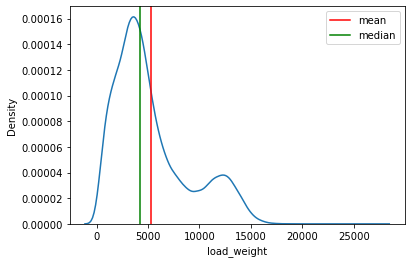

In [37]:
sns.kdeplot(data)
plt.axvline(data.mean(), color='r', label='mean')
plt.axvline(data.median(), color='g', label='median')
plt.legend()

Calling sns for making statistical graphics from data. If it is normally distributed, then the mean and median are on one line, based on the results of the drawing, the mean and median lines are not on the same line

In [38]:
data.quantile([.25, .5, .75])

0.25    2680.0
0.50    4260.0
0.75    6940.0
Name: load_weight, dtype: float64

Call data.quantile() because EVA data is not normally distributed, then use IQR

In [39]:
Q3 = data.quantile(.75)
Q1 = data.quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

Define the first and third quantiles and then subtract between Q3 and Q1 on the IQR variable. Then define the upper and lower.

In [40]:
upper

19720.0

Calling upper to see the result

In [41]:
lower

-10100.0

Calling lower to see the result

In [42]:
data.isnull().sum()

0

Call isnull(). sum() to return the number of missing values in the data set

In [43]:
df_clean = data[(data <= upper)&
              (data > 0)]

Create a new variable named df clean to remove outliers

In [44]:
df_clean.min()

20.0

Calling min() to return the item with the lowest value

In [45]:
(df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100

38.287082396125136

Call (df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100 to see the percentage of outliers. The percentage is 38.28%

<AxesSubplot:ylabel='load_weight'>

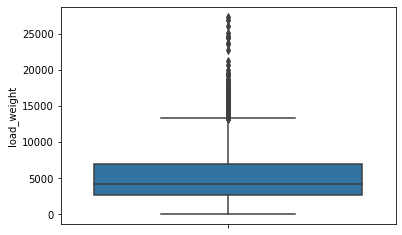

In [46]:
sns.boxplot(y = data)

Calling sns.boxplot(y = data) to see an overview of the data before removing the outliers. Based on the figure, it can be seen that data has been identified as an outlier as the outlier value is far from the center of the distribution compared to other values that it skews the distribution by affecting the mean.

<AxesSubplot:ylabel='load_weight'>

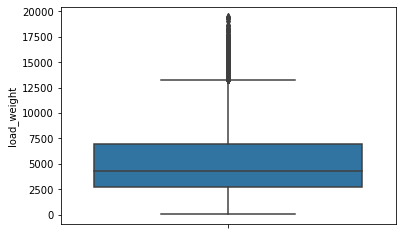

In [47]:
sns.boxplot(y = df_clean)

Calling sns.boxplot(y = df_clean) to see a picture of the data after removing the outliers. Based on the figure, it can be seen that data is more distributed but not symmetrical.

In [48]:
data.describe()

count    89603.000000
mean      5305.020334
std       3675.176552
min          0.000000
25%       2680.000000
50%       4260.000000
75%       6940.000000
max      27320.000000
Name: load_weight, dtype: float64

Calling data.describe() to see how it compares to the cleared data

In [49]:
df_clean.describe()

count    89443.000000
mean      5311.035598
std       3665.216643
min         20.000000
25%       2700.000000
50%       4260.000000
75%       6940.000000
max      19480.000000
Name: load_weight, dtype: float64

Calling df_clean.describe() to see how it compares to the data before cleaning

Data before cleaning has a larger number of counts than data that has been cleaned. However, the mean number of data before being cleaned is smaller than the data that has been cleaned

6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [50]:
print(df_clean.max() - df_clean.min())

19460.0


Calls (df_clean.max() - df_clean.min()) to return a range of values for the cleaned data

In [51]:
print(df_clean.var())

13433813.043767547


Calls .var() to return a variance for the cleaned data

In [52]:
print(df_clean.std())

3665.216643497018


Calls .std() to return a standard deviation for the cleaned data

7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

In [53]:
ci = stats.norm.interval(0.95, data.mean(),data.std())
ci

(-1898.1933445149707, 12508.234012796165)

Create a new variable confidence interval named ci contains the previously selected data site (MRF)

If the government wants to add a site, the site can only receive load weights between -1898.19 and 12508.23

8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

The hypothesis on this case
- H0 : **average `df_clean` <= data**
- H1 : **average `df_clean` > data**


Create a hypothesis to be tested

In [54]:
stat, p_value = ttest_1samp(df_clean, data.mean())
print(stat)
print(p_value)

0.49082674316365155
0.6235501976519664


Calls stat, p_value = ttest_1samp(df_clean, data.mean()) to find the t statistic along with the p-value

C:\Users\Amabel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


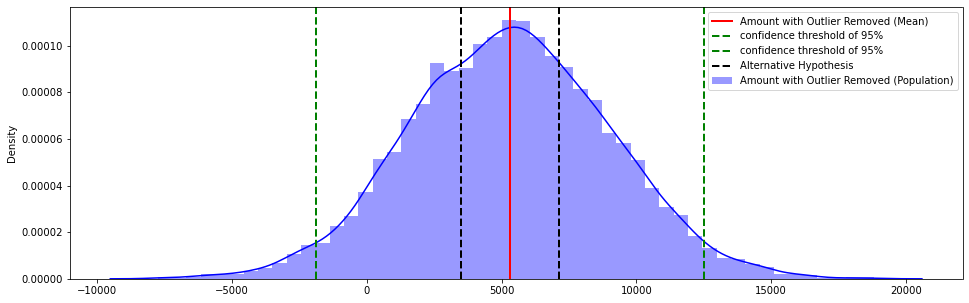

In [55]:
outlier_removed_pop = np.random.normal(df_clean.mean(), df_clean.std(), 10000)

ci = stats.norm.interval(0.95, df_clean.mean(), df_clean.std())

plt.figure(figsize=(16,5))
sns.distplot(outlier_removed_pop, label='Amount with Outlier Removed (Population)', color='blue')
plt.axvline(df_clean.mean(), color='red', linewidth=2, label='Amount with Outlier Removed (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(outlier_removed_pop.mean() + stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(outlier_removed_pop.mean() - stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Eliminate outliers from the data and test hypotheses and find out if there are significant differences

Since our p-value is above than 0.05, it can be concluded that it is not successful to reject the null hypothesis

There is a difference in the data (data before cleaning from outliers) with df_clean (data after cleaning from outliers)

9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

This notebook aims to provide ready-to-process data that will be submitted to the government. The data processed is the smallest average of waste disposal and management in Austin Smart City, which is at the MRF site. It is suspected that there are outliers or extreme values in the data, the data science team is responsible for cleaning the data from these outliers. <br>
It can be concluded that the initial data on the load weight dropoff site named MRF has outliers. This may be due to an input error, or sampling error and the wrong subject in the initial data collection carried out by the division that collects the data, it is better to clean the data first by the data science team at Austin Smart City before statistical analysis is carried out. After doing data cleaning, it turns out that the data before and after cleaning have different values. So it is better to analyze the data based on the data that has been cleaned because if government use the initial data, the data has a value that is very far from the general value. <br>
The cleaned data can be submitted to other divisions such as the data analyst division for further analysis or business analytics where the data load weight on the MRF site may provide good fortune for businesses or the country's economy.